In [3]:
import pandas as pd
import pickle
import numpy as np
df=pickle.load(open('dataset_level2.pk1','rb'))
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,West Indies,India,0.1,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,0,West Indies,India,0.2,0,JD Campbell,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,0,West Indies,India,0.3,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,0,West Indies,India,0.4,1,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,0,West Indies,India,0.5,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
...,...,...,...,...,...,...,...,...
118,962,Pakistan,New Zealand,19.2,1,0,Auckland,Eden Park
119,962,Pakistan,New Zealand,19.3,0,Faheem Ashraf,Auckland,Eden Park
120,962,Pakistan,New Zealand,19.4,2,0,Auckland,Eden Park
121,962,Pakistan,New Zealand,19.5,1,0,Auckland,Eden Park


In [4]:
#Features Required For Estimating Predicted Score
#Batting Team
#Bowling Team
#City
#Current Score
#Current Run Rate
#Ball Left
#Last 5 overs runs

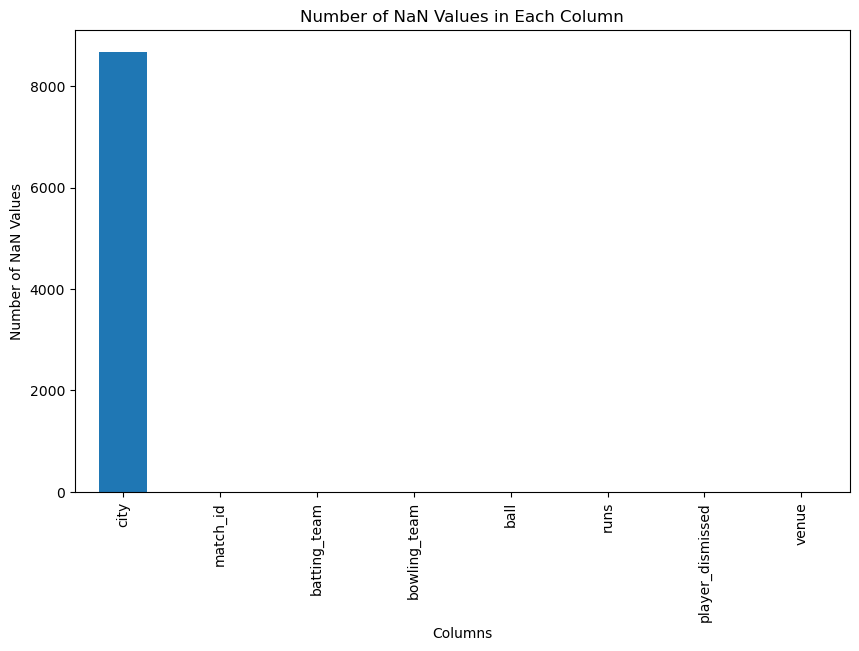

In [5]:
import matplotlib.pyplot as plt

# Calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# Sort columns by the number of NaN values
nan_counts_sorted = nan_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
nan_counts_sorted.plot(kind='bar')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=90)
plt.show()


In [6]:
df[df['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium        3092
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: count, dtype: int64

In [7]:
#Extracting 1st word of each venue of the null cities column gives the city 
cities=np.where(df['city'].isnull(),df['venue'].str.split().str[0],df['city'])

In [8]:
df['city']=cities

In [9]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [10]:
df.drop(columns='venue',inplace=True)

In [11]:
df['city'].value_counts()

city
Colombo          4208
Mirpur           3420
Johannesburg     3331
Dubai            3092
Auckland         2655
                 ... 
Nairobi           123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: count, Length: 87, dtype: int64

In [12]:
#Filtering cities having atleast 500 balls bowled for good score
df = df[df['city'].map(df['city'].value_counts()) > 500]


In [13]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,0,West Indies,India,0.1,0,0,Lauderhill
1,0,West Indies,India,0.2,0,JD Campbell,Lauderhill
2,0,West Indies,India,0.3,0,0,Lauderhill
3,0,West Indies,India,0.4,1,0,Lauderhill
4,0,West Indies,India,0.5,0,0,Lauderhill
...,...,...,...,...,...,...,...
118,962,Pakistan,New Zealand,19.2,1,0,Auckland
119,962,Pakistan,New Zealand,19.3,0,Faheem Ashraf,Auckland
120,962,Pakistan,New Zealand,19.4,2,0,Auckland
121,962,Pakistan,New Zealand,19.5,1,0,Auckland


In [14]:
df['runs']

0      0
1      0
2      0
3      1
4      0
      ..
118    1
119    0
120    2
121    1
122    1
Name: runs, Length: 53831, dtype: int64

In [15]:
df['current_score']=df.groupby('match_id')['runs'].cumsum()

/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86894/2789925231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score']=df.groupby('match_id')['runs'].cumsum()


In [16]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,0,West Indies,India,0.1,0,0,Lauderhill,0
1,0,West Indies,India,0.2,0,JD Campbell,Lauderhill,0
2,0,West Indies,India,0.3,0,0,Lauderhill,0
3,0,West Indies,India,0.4,1,0,Lauderhill,1
4,0,West Indies,India,0.5,0,0,Lauderhill,1
...,...,...,...,...,...,...,...,...
118,962,Pakistan,New Zealand,19.2,1,0,Auckland,149
119,962,Pakistan,New Zealand,19.3,0,Faheem Ashraf,Auckland,149
120,962,Pakistan,New Zealand,19.4,2,0,Auckland,151
121,962,Pakistan,New Zealand,19.5,1,0,Auckland,152


In [17]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122],
      dtype='int64', length=53831)

In [18]:
df['balls_left'] = 119 - df.index #Index starts from 0 thus 120-1=119
#df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df['balls_left'] = df['balls_left'].clip(lower=0)#Clip in pandas limit the values in dataframe
#when a specific 'lower=0' argument is given ,it ensures any value below 0 is set to 0


/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86894/619590249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 119 - df.index #Index starts from 0 thus 120-1=119
/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86894/619590249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].clip(lower=0)#Clip in pandas limit the values in dataframe


In [19]:
#backup_df=df.copy()


In [20]:
#Converting the player dismissed to 1 and calculating wickets left also converting the player dismissed column to int
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == '0' else 1).astype(int)
df['wickets_left'] = 10 - df.groupby('match_id')['player_dismissed'].cumsum()

/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86894/3386371534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == '0' else 1).astype(int)
/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86894/3386371534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wickets_left'] = 10 - df.groupby('match_id')['player_dismissed'].cumsum()


In [21]:
df.head(124)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,balls_left,wickets_left
0,0,West Indies,India,0.1,0,0,Lauderhill,0,119,10
1,0,West Indies,India,0.2,0,1,Lauderhill,0,118,9
2,0,West Indies,India,0.3,0,0,Lauderhill,0,117,9
3,0,West Indies,India,0.4,1,0,Lauderhill,1,116,9
4,0,West Indies,India,0.5,0,0,Lauderhill,1,115,9
...,...,...,...,...,...,...,...,...,...,...
119,0,West Indies,India,19.2,0,0,Lauderhill,95,0,2
120,0,West Indies,India,19.3,0,1,Lauderhill,95,0,1
121,0,West Indies,India,19.4,0,0,Lauderhill,95,0,1
122,0,West Indies,India,19.5,0,0,Lauderhill,95,0,1


In [22]:
df['current_run_rate']=(df['current_score']*6)/(df.index+1)

/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86894/2525712723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_run_rate']=(df['current_score']*6)/(df.index+1)


In [23]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,balls_left,wickets_left,current_run_rate
0,0,West Indies,India,0.1,0,0,Lauderhill,0,119,10,0.000000
1,0,West Indies,India,0.2,0,1,Lauderhill,0,118,9,0.000000
2,0,West Indies,India,0.3,0,0,Lauderhill,0,117,9,0.000000
3,0,West Indies,India,0.4,1,0,Lauderhill,1,116,9,1.500000
4,0,West Indies,India,0.5,0,0,Lauderhill,1,115,9,1.200000
...,...,...,...,...,...,...,...,...,...,...,...
118,962,Pakistan,New Zealand,19.2,1,0,Auckland,149,1,2,7.512605
119,962,Pakistan,New Zealand,19.3,0,1,Auckland,149,0,1,7.450000
120,962,Pakistan,New Zealand,19.4,2,0,Auckland,151,0,1,7.487603
121,962,Pakistan,New Zealand,19.5,1,0,Auckland,152,0,1,7.475410


In [24]:
df['runs']

0      0
1      0
2      0
3      1
4      0
      ..
118    1
119    0
120    2
121    1
122    1
Name: runs, Length: 53831, dtype: int64

In [25]:
groups=df.groupby('match_id')
last_five=[]
for match_id, group in groups:
    # Calculate the rolling sum of runs for the last 30 balls of each match
    rolling_sum = group['runs'].rolling(window=30).sum()
    # Extract the rolling sum for the last 30 balls and convert to a list
    last_five.extend(rolling_sum.values.tolist())


In [26]:
df['last_five_overs']=last_five
df


/var/folders/15/3mp7dw4d1fnfldgkpkwvz78h0000gn/T/ipykernel_86894/482849499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five_overs']=last_five


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,balls_left,wickets_left,current_run_rate,last_five_overs
0,0,West Indies,India,0.1,0,0,Lauderhill,0,119,10,0.000000,NaN
1,0,West Indies,India,0.2,0,1,Lauderhill,0,118,9,0.000000,NaN
2,0,West Indies,India,0.3,0,0,Lauderhill,0,117,9,0.000000,NaN
3,0,West Indies,India,0.4,1,0,Lauderhill,1,116,9,1.500000,NaN
4,0,West Indies,India,0.5,0,0,Lauderhill,1,115,9,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
118,962,Pakistan,New Zealand,19.2,1,0,Auckland,149,1,2,7.512605,56.0
119,962,Pakistan,New Zealand,19.3,0,1,Auckland,149,0,1,7.450000,50.0
120,962,Pakistan,New Zealand,19.4,2,0,Auckland,151,0,1,7.487603,52.0
121,962,Pakistan,New Zealand,19.5,1,0,Auckland,152,0,1,7.475410,53.0


In [27]:
#backup2_df=df.copy()

In [28]:
last_five

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 27.0,
 27.0,
 27.0,
 26.0,
 26.0,
 26.0,
 25.0,
 25.0,
 26.0,
 22.0,
 16.0,
 17.0,
 18.0,
 19.0,
 17.0,
 17.0,
 15.0,
 15.0,
 15.0,
 16.0,
 20.0,
 21.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 16.0,
 16.0,
 12.0,
 12.0,
 12.0,
 12.0,
 13.0,
 14.0,
 14.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 19.0,
 25.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 22.0,
 22.0,
 24.0,
 23.0,
 23.0,
 24.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 21.0,
 24.0,
 24.0,
 24.0,
 23.0,
 23.0,
 29.0,
 24.0,
 24.0,
 25.0,
 25.0,
 25.0,
 24.0,
 30.0,
 30.0,
 28.0,
 28.0,
 28.0,
 27.0,
 26.0,
 25.0,
 25.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [29]:
final_df=df.groupby('match_id')['runs'].sum().reset_index().merge(df,on='match_id')
#Merge operation combines the 2 dataframes horizontally,adding the total runs as a new column to the original df
#It creates 2 variables. runs_x which shows total runs and runs_y which shows runs created at that ball

In [30]:
#columns_to_drop = ['ball', 'player_dismissed', 'column3']
#df.drop(columns=columns_to_drop,inplace=True)

In [31]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','current_run_rate','last_five_overs','runs_x']]

In [32]:
final_df.isnull().sum()

batting_team            0
bowling_team            0
city                    0
current_score           0
balls_left              0
wickets_left            0
current_run_rate        0
last_five_overs     12836
runs_x                  0
dtype: int64

In [33]:
final_df.dropna(inplace=True)

In [34]:
final_df.isnull().sum()

batting_team        0
bowling_team        0
city                0
current_score       0
balls_left          0
wickets_left        0
current_run_rate    0
last_five_overs     0
runs_x              0
dtype: int64

In [35]:
#Shuffling is done to prevent bias sample is used which selects such rows randomly
final_df=final_df.sample(final_df.shape[0])
final_df


,batting_team,bowling_team,city,current_score,balls_left,wickets_left,current_run_rate,last_five_overs,runs_x
20912,India,England,Manchester,117,35,6,8.258824,46.0,165
40740,England,West Indies,Barbados,50,64,7,5.357143,25.0,152
43919,West Indies,England,London,101,6,5,5.315789,42.0,113
35231,England,New Zealand,Auckland,203,3,4,10.410256,46.0,214
26748,India,Pakistan,Bangalore,123,10,3,6.709091,25.0,133
...,...,...,...,...,...,...,...,...,...
42316,Australia,India,Sydney,102,44,8,8.052632,41.0,186
23814,West Indies,Pakistan,Abu Dhabi,68,40,5,5.100000,36.0,103
41802,England,Australia,Melbourne,64,59,7,6.295082,30.0,137
31104,Sri Lanka,South Africa,Delhi,85,38,4,6.219512,16.0,120


In [36]:
final_df['city'].unique()

array(['Manchester', 'Barbados', 'London', 'Auckland', 'Bangalore',
       'Colombo', 'Cape Town', 'Mirpur', 'Pallekele', 'Abu Dhabi',
       'Christchurch', 'Dubai', 'Melbourne', 'Nottingham', 'Hamilton',
       'Mount Maunganui', 'Wellington', 'Centurion', 'Lauderhill',
       'Durban', 'Nagpur', 'Southampton', 'Hambantota', 'Johannesburg',
       'Cardiff', 'Kolkata', 'St Lucia', 'Lucknow', 'Trinidad',
       'Chandigarh', 'Birmingham', 'Adelaide', 'Sydney', 'Dhaka',
       'Chittagong', 'Mumbai', 'Delhi', 'Brisbane', 'Lahore', 'St Kitts'],
      dtype=object)

Mode Building


In [37]:
X=final_df.drop(columns='runs_x') #Features 
y=final_df['runs_x'] #target i.e total score which needs to be predicted
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#random_state is used to control the random shuffling of the dataset before shuffling

In [38]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,current_run_rate,last_five_overs
48604,South Africa,Pakistan,Johannesburg,111,22,6,6.795918,24.0
22659,Afghanistan,India,St Lucia,30,80,7,4.500000,24.0
43790,West Indies,South Africa,Johannesburg,101,11,4,5.559633,40.0
15186,Australia,India,Sydney,145,1,4,7.310924,46.0
40103,England,Pakistan,Dubai,41,79,9,6.000000,35.0
...,...,...,...,...,...,...,...,...
49292,Sri Lanka,West Indies,Barbados,97,50,9,8.314286,48.0
17102,Australia,South Africa,Melbourne,147,27,6,9.483871,45.0
32338,South Africa,New Zealand,Auckland,104,49,8,8.788732,45.0
33737,Sri Lanka,Bangladesh,Colombo,138,6,4,7.263158,51.0


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [40]:
#As 3 columns are in string which are converted using onehotencoder
#Label Encoder assigns numerical label where as oneHotEncoder assigns binary vector representaton
encoded_columns=ColumnTransformer([('encoded_columns',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])]
                                  ,remainder='passthrough')

In [41]:
#n_estimator represents no. of trees to be created in boosting process
#max_depth maximum depth of eachtree in the ensemble. Deeper tree may capture more complex pattern but may result to overfitting
#learning_rate controls the step size at each iteration
pipe=Pipeline(steps=[
    ('step1',encoded_columns),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=5000,learning_rate=0.1,max_depth=10,random_state=1))
])

In [42]:
#Pipline in ML is series of data processing components connected together
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
r2_score(y_test,y_pred)

0.9900662842511146

In [44]:
mean_absolute_error(y_test,y_pred)

1.473809302849135

In [45]:
pickle.dump(pipe,open('pipe.pk1','wb'))